In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.noise import *
from scipy.signal.windows import dpss
import sys

n_external = 3000

zmin = 2.4
zmax = 3.4

chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

# get CMB lensing component
from LIMxCMBL.kernels import get_f_Kkappa
f_WkD = get_f_Kkappa()

from LIMxCMBL.cross_spectrum import *
ClKK = d_chib_integral(f_WkD, f_WkD) #[Mpc]^2


# beam=1.4, noise=7
from scipy.interpolate import interp1d
N0_ells = np.logspace(1, np.log10(5000), 500)
with open('LIMxCMBL/N0.npy', 'rb') as f:
    N0 = np.load(f)
    
f_N0 = interp1d(x = N0_ells, y = N0)


# if no high pass IKappa
from  LIMxCMBL.kernels import *
f_Kkappa = get_f_Kkappa()


f_KLIM   = interp1d(x=chis, y = KI_CO, bounds_error = False, fill_value=0)
f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)

In [2]:
external_chis = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), n_external)

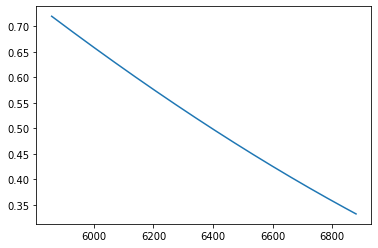

In [4]:
import matplotlib.pyplot as plt
plt.plot(external_chis, f_KLIM(external_chis))

In [5]:
from scipy.interpolate import LinearNDInterpolator


In [6]:
tmp_chibs = []
tmp_log_deltas = []
tmp_fnctn = []
for i in range(len(chibs)):
    for j in range(len(deltas)):
        tmp_chibs += [chibs[i]]
        tmp_log_deltas += [np.log10(deltas[j])]
        tmp_fnctn += [inner_dkparp_integral[:,i,j]]
        
new_f_inner_integral = LinearNDInterpolator(list(zip(tmp_chibs, tmp_log_deltas)), tmp_fnctn)

In [7]:
X, Y = np.meshgrid(chibs, np.log10(deltas))
new_f_inner_integral(X, Y).shape

(128, 256, 100)

In [8]:
def f_unfiltered_auto(chi, chip):
    ret = 4/(chi + chip)**2
    ret *= f_KLIM_windowed(chi) * f_KLIM_windowed(chip)
    _delta = np.abs((chi - chip) / (chi + chip))
    
    ### bound delta
    _delta = np.where(_delta > 0.7, 0.7, _delta)
    _delta = np.where(_delta < 1e-6, 1e-6, _delta)
    
    _chib  = (chi + chip) / 2
    X, Y = np.meshgrid(_chib, np.log10(_delta))
    return ret * new_f_inner_integral(X,Y)

In [9]:
from scipy.integrate import quad_vec

In [10]:
unfiltered_auto = np.zeros((100, n_external, n_external))
for i in trange(n_external):
    for j in range(i, n_external):
        unfiltered_auto[:, i, j] = unfiltered_auto[:, j, i] = f_unfiltered_auto(external_chis[i], 
                                                                                external_chis[j])

100%|██████████| 3000/3000 [10:35<00:00,  4.72it/s] 


In [11]:
import matplotlib.pyplot as plt

In [12]:
np.save('/scratch/users/delon/LIMxCMBL/I_auto/I_auto_n_ext_%d_zmin_%.1f_zmax_%.1f.npy'%(n_external, zmin, zmax), unfiltered_auto)

2.1528884850651224e-05 2.1528884850651224e-05


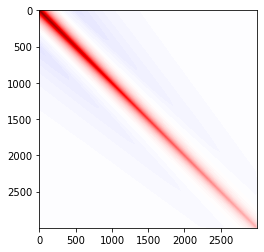

2.154740598157109e-05 2.154740598157109e-05


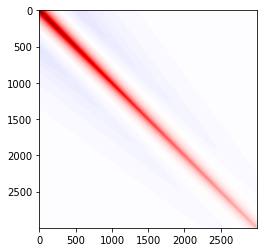

2.1567189291663553e-05 2.1567189291663553e-05


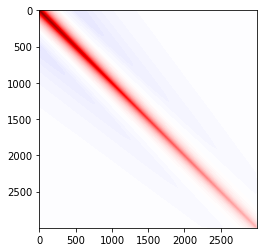

2.158826124946068e-05 2.158826124946068e-05


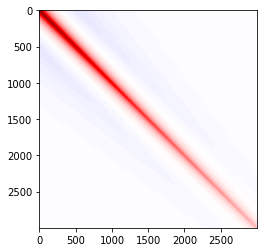

2.1610636115184332e-05 2.1610636115184332e-05


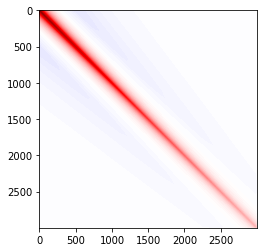

2.1634313226793423e-05 2.1634313226793423e-05


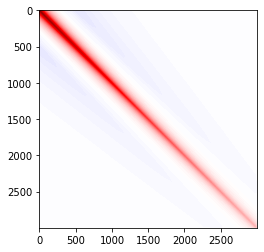

2.1659273546995e-05 2.1659273546995e-05


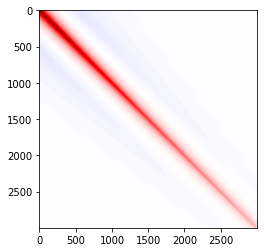

2.1685475567685336e-05 2.1685475567685336e-05


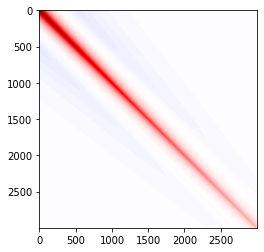

2.171285012764297e-05 2.171285012764297e-05


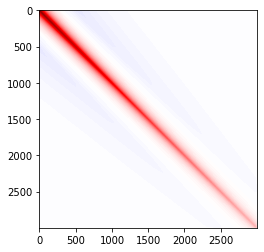

2.1741295766094095e-05 2.1741295766094095e-05


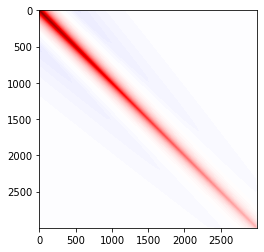

2.177067327260469e-05 2.177067327260469e-05


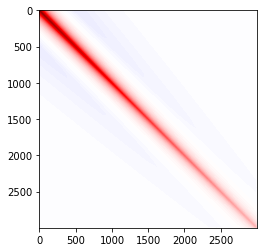

2.1800799141579748e-05 2.1800799141579748e-05


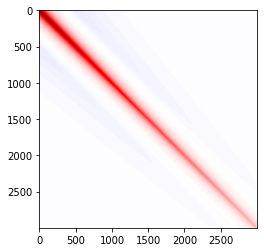

2.1831438677036914e-05 2.1831438677036914e-05


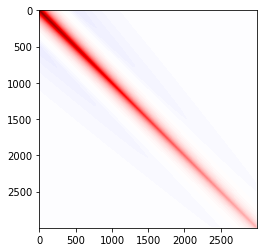

2.1862298248021425e-05 2.1862298248021425e-05


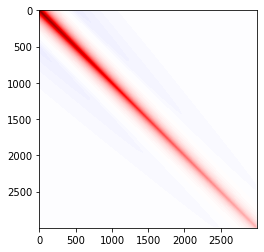

2.1893016989077136e-05 2.1893016989077136e-05


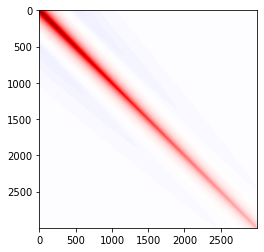

2.1923158052236395e-05 2.1923158052236395e-05


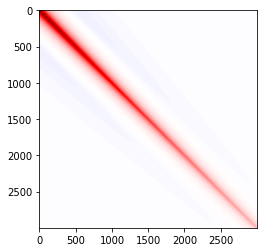

2.1952199120129242e-05 2.1952199120129242e-05


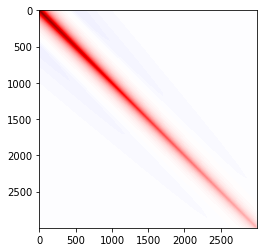

2.1979522557409955e-05 2.1979522557409955e-05


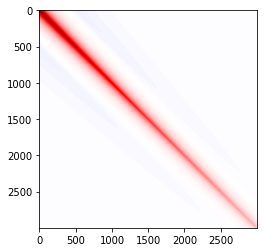

2.200440573716807e-05 2.200440573716807e-05


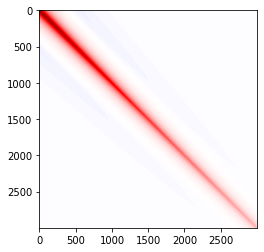

2.2026010798578295e-05 2.2026010798578295e-05


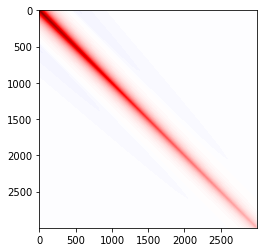

2.204337544598154e-05 2.204337544598154e-05


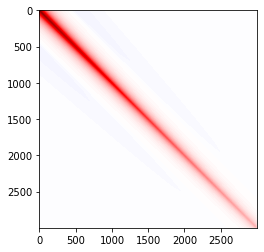

2.2055404429626668e-05 2.2055404429626668e-05


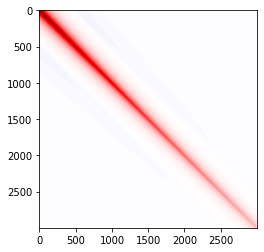

2.2060862717037754e-05 2.2060862717037754e-05


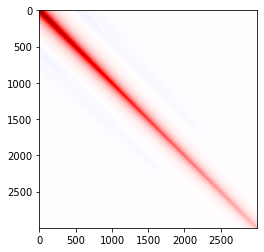

2.2058370886859342e-05 2.2058370886859342e-05


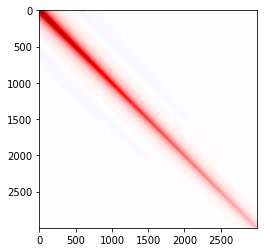

2.2046404481026244e-05 2.2046404481026244e-05


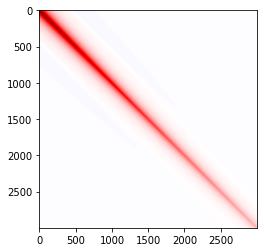

2.20232975319118e-05 2.20232975319118e-05


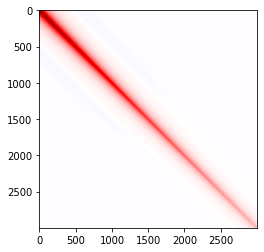

2.1987252928353634e-05 2.1987252928353634e-05


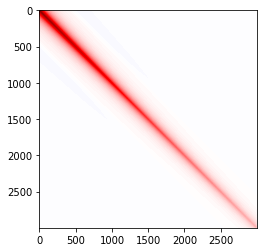

2.1936360130535454e-05 2.1936360130535454e-05


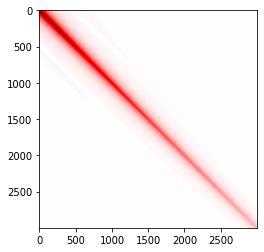

2.1868623834832382e-05 2.1868623834832382e-05


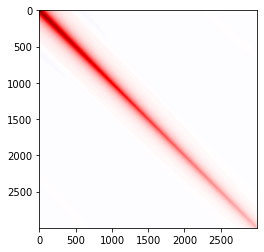

2.1782004071207566e-05 2.1782004071207566e-05


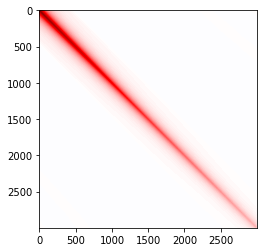

2.1674470022711825e-05 2.1674470022711825e-05


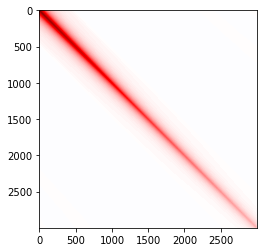

2.154407094473093e-05 2.154407094473093e-05


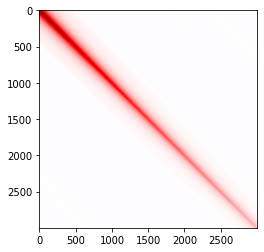

2.13890222979696e-05 2.13890222979696e-05


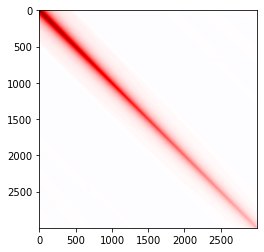

2.1207810213022096e-05 2.1207810213022096e-05


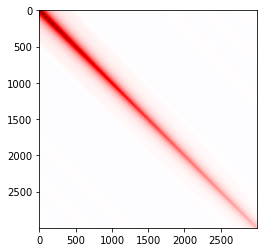

2.099930874661883e-05 2.099930874661883e-05


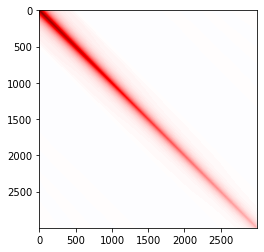

2.0762910482649044e-05 2.0762910482649044e-05


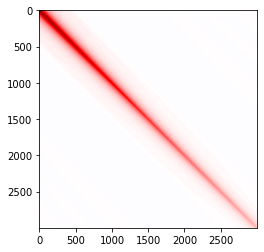

2.049865682539219e-05 2.049865682539219e-05


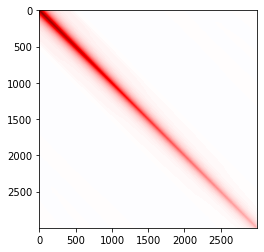

2.020736147577967e-05 2.020736147577967e-05


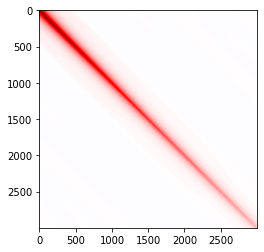

1.9890707536249517e-05 1.9890707536249517e-05


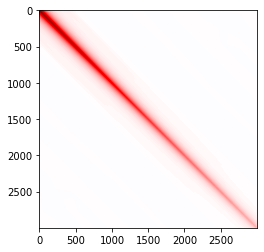

1.9551295306121014e-05 1.9551295306121014e-05


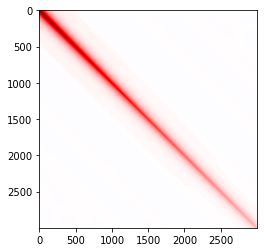

1.9192615063388853e-05 1.9192615063388853e-05


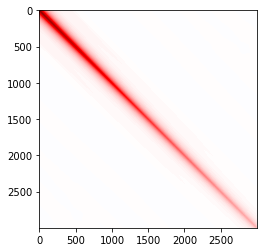

1.881890727441803e-05 1.881890727441803e-05


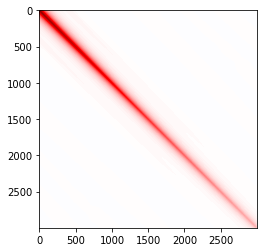

1.8434863756409916e-05 1.8434863756409916e-05


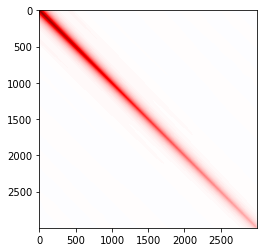

1.8044860646935665e-05 1.8044860646935665e-05


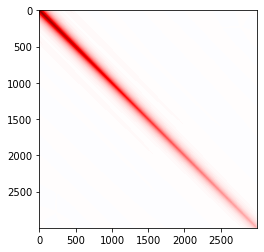

1.7653997799498304e-05 1.7653997799498304e-05


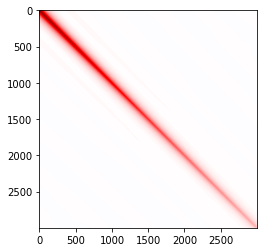

1.726706092925274e-05 1.726706092925274e-05


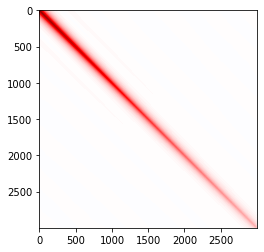

1.688580481504168e-05 1.688580481504168e-05


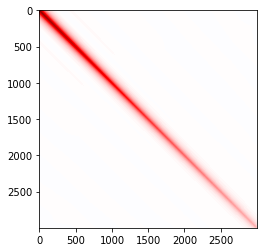

1.6508907931394372e-05 1.6508907931394372e-05


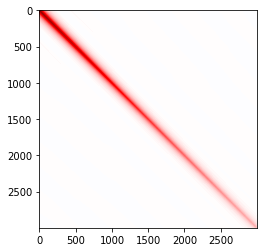

1.6132049740282982e-05 1.6132049740282982e-05


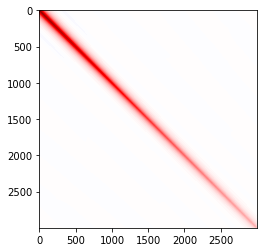

1.5748747665787062e-05 1.5748747665787062e-05


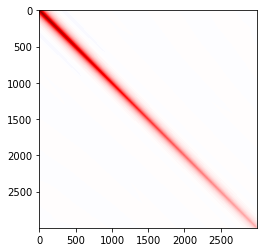

1.5352063844816798e-05 1.5352063844816798e-05


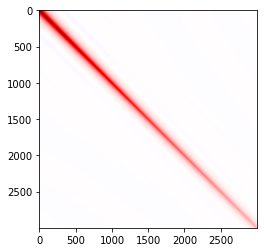

1.4929485564466387e-05 1.4929485564466387e-05


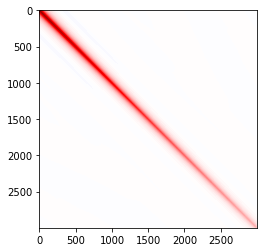

1.4467256987561569e-05 1.4467256987561569e-05


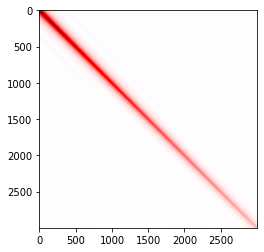

1.3960174859067022e-05 1.3960174859067022e-05


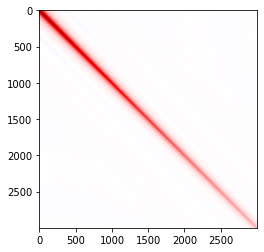

1.3409142744773295e-05 1.3409142744773295e-05


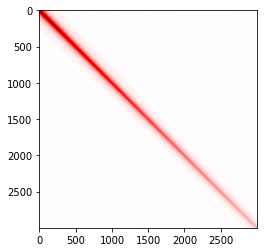

1.2826553647643412e-05 1.2826553647643412e-05


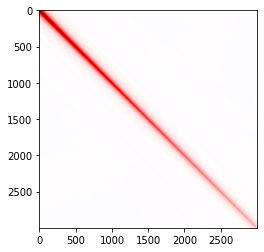

1.2234911487774696e-05 1.2234911487774696e-05


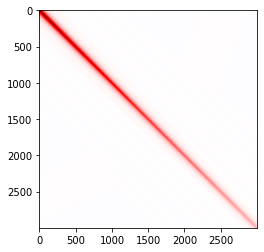

1.1661385868468146e-05 1.1661385868468146e-05


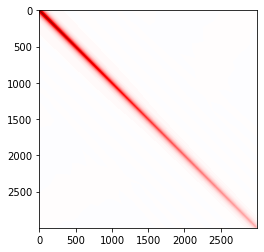

1.1130814185040756e-05 1.1130814185040756e-05


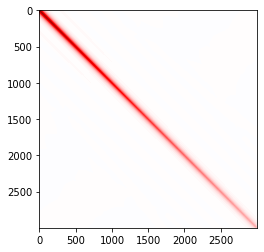

1.0656916962122072e-05 1.0656916962122072e-05


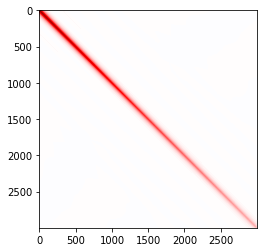

1.0233118433328496e-05 1.0233118433328496e-05


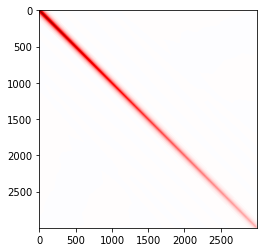

9.83192857832051e-06 9.83192857832051e-06


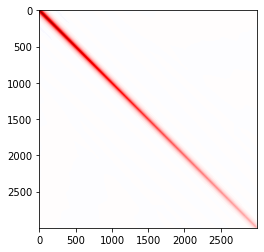

9.415342569960472e-06 9.415342569960472e-06


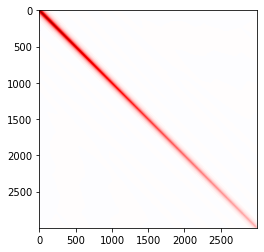

8.951973424552979e-06 8.951973424552979e-06


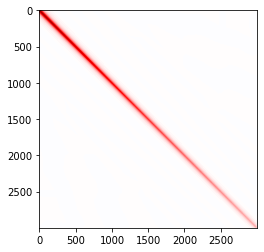

8.444470623328008e-06 8.444470623328008e-06


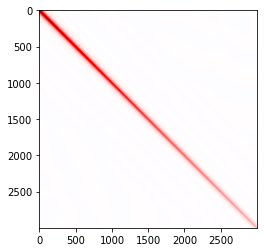

7.936700840979992e-06 7.936700840979992e-06


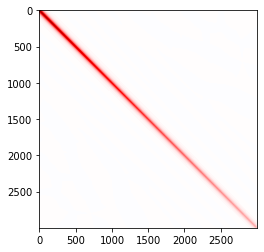

7.4779333270040356e-06 7.4779333270040356e-06


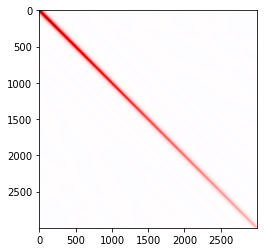

7.088862286941248e-06 7.088862286941248e-06


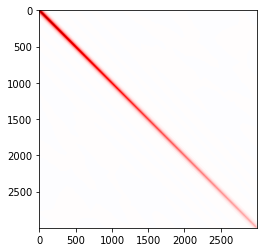

6.738295854530838e-06 6.738295854530838e-06


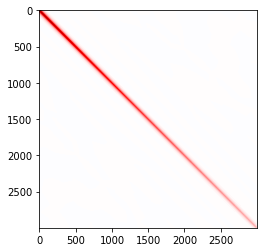

6.372007685206449e-06 6.372007685206449e-06


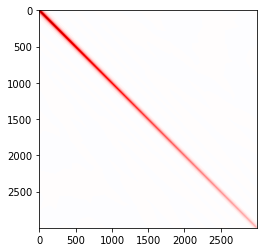

5.971991157100822e-06 5.971991157100822e-06


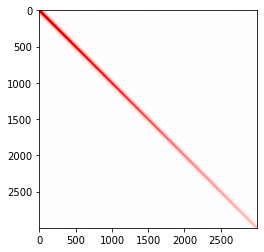

5.578873078215949e-06 5.578873078215949e-06


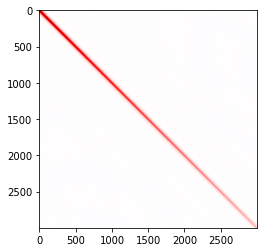

5.23807185374051e-06 5.23807185374051e-06


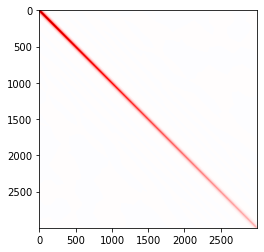

4.934787546948037e-06 4.934787546948037e-06


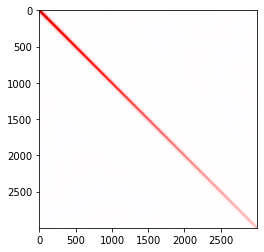

4.623235433753325e-06 4.623235433753325e-06


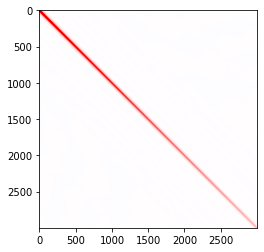

4.306431034255091e-06 4.306431034255091e-06


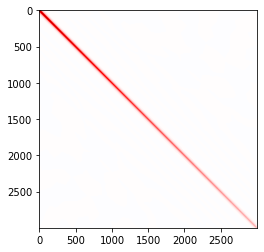

4.021651954179494e-06 4.021651954179494e-06


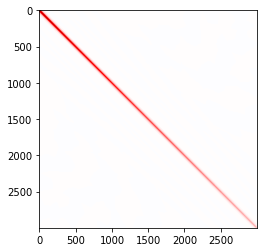

3.761881182055349e-06 3.761881182055349e-06


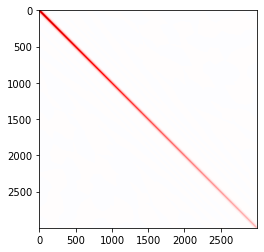

3.501722754917446e-06 3.501722754917446e-06


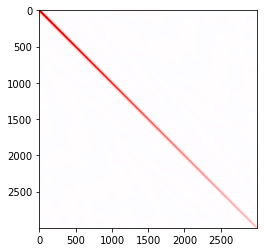

3.2562391942036055e-06 3.2562391942036055e-06


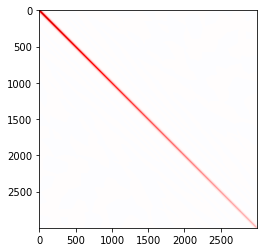

3.03187149216021e-06 3.03187149216021e-06


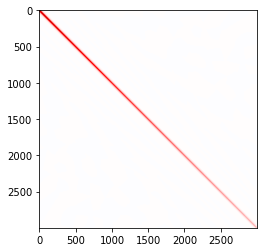

2.8145677171682896e-06 2.8145677171682896e-06


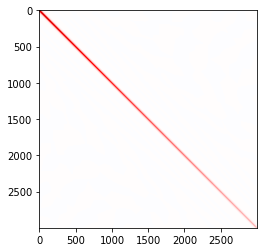

2.611605012277473e-06 2.611605012277473e-06


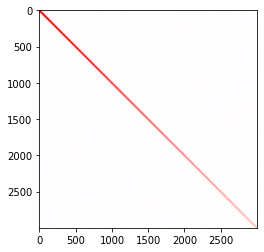

2.4217828418377204e-06 2.4217828418377204e-06


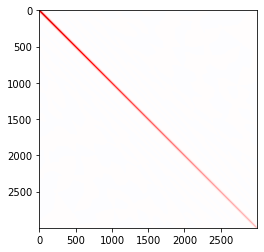

2.242271399208025e-06 2.242271399208025e-06


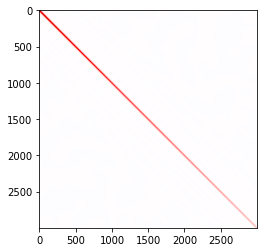

2.0751604676151445e-06 2.0751604676151445e-06


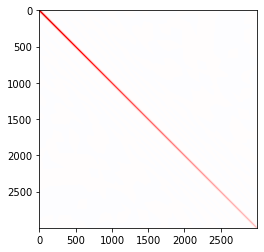

1.9181044813412128e-06 1.9181044813412128e-06


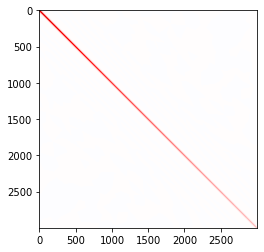

1.771711086090619e-06 1.771711086090619e-06


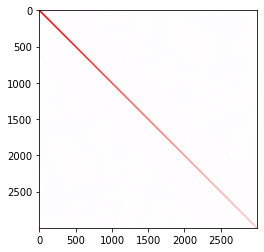

1.6349003668587979e-06 1.6349003668587979e-06


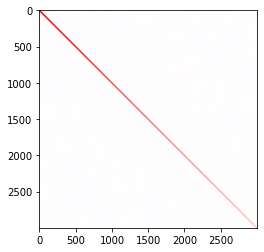

1.5074930251442438e-06 1.5074930251442438e-06


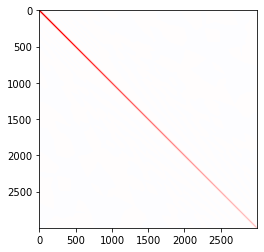

1.3887765859511187e-06 1.3887765859511187e-06


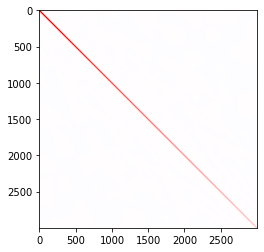

1.2783583158345583e-06 1.2783583158345583e-06


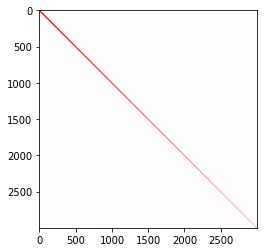

1.175821120257342e-06 1.175821120257342e-06


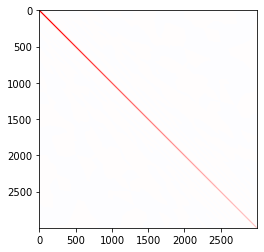

1.080713143668041e-06 1.080713143668041e-06


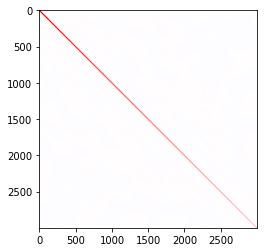

9.925729189850083e-07 9.925729189850083e-07


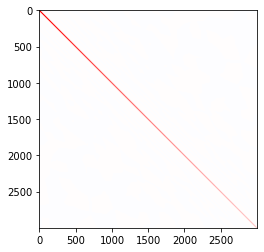

9.109617938939652e-07 9.109617938939652e-07


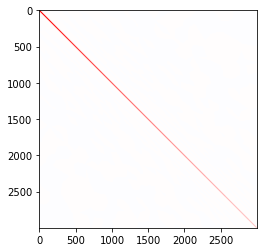

8.354668875502387e-07 8.354668875502387e-07


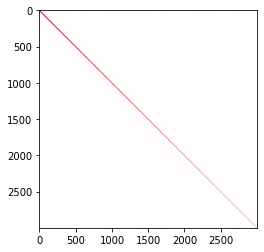

7.656998857803264e-07 7.656998857803264e-07


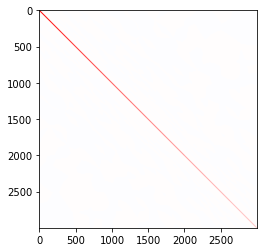

7.012895501290259e-07 7.012895501290259e-07


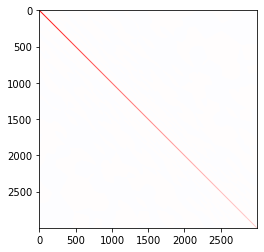

6.418800927651667e-07 6.418800927651667e-07


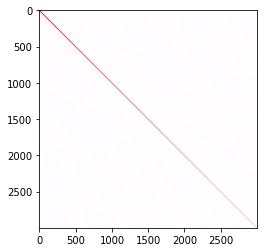

In [13]:
for ell_idx in range(len(ells)):
    vb = np.max(np.abs(unfiltered_auto[ell_idx]))
    plt.imshow(unfiltered_auto[ell_idx], vmin = -vb, vmax = vb, cmap = 'seismic')
    print(np.max(np.abs(unfiltered_auto[ell_idx])), vb)
    plt.show()